In [3]:
# garch_forecast_analysis.ipynb

import os
import matplotlib.pyplot as plt

# Set working directory and load API key
import Forcast_EQ_AR1GARCH11 as garch_forecast

import _CFG_API_Key
api_key = _CFG_API_Key.AlphaVantage_API_KEY




In [4]:
# Load data
log_returns = garch_forecast.load_data(api_key)

# Run forecast
mean_forecasts, quantile_1, quantile_99, actuals, num_outliers, outlier_ratio = garch_forecast.rolling_garch_forecast(log_returns)



D:\Anaconda\install\lib\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0005774. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
D:\Anaconda\install\lib\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0005819. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
D:\Anaconda\install\lib\site-packages\arch\univariate\base.py:309: DataScaleWarning: y

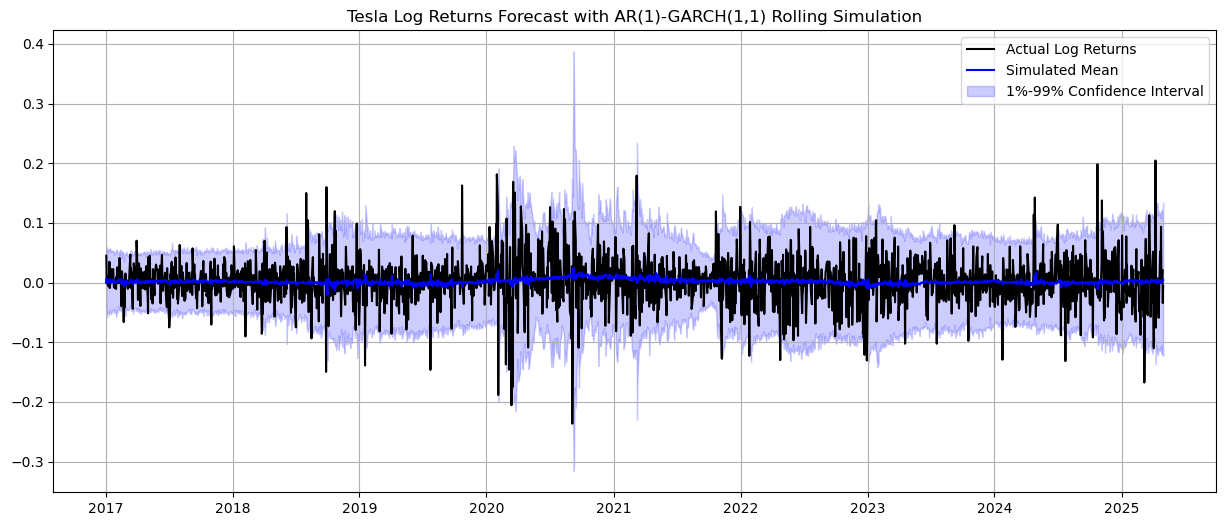

Total number of outliers: 80.
Outlier ratio: 3.82%.


In [5]:
# Plot results
plt.figure(figsize=(15, 6))
plt.plot(actuals, label='Actual Log Returns', color='black')
plt.plot(mean_forecasts, label='Simulated Mean', color='blue')
plt.fill_between(mean_forecasts.index, quantile_1, quantile_99, color='blue', alpha=0.2, label='1%-99% Confidence Interval')
plt.title('Tesla Log Returns Forecast with AR(1)-GARCH(1,1) Rolling Simulation')
plt.legend()
plt.grid(True)
plt.show()

print(f"Total number of outliers: {num_outliers}.")
print(f"Outlier ratio: {outlier_ratio:.2%}.")